# **Foundations of Data Science Fall 2022 - Homework 2 (30 points)**

### Student Name: Sai Nishanth Mettu
### Student Net Id: sm11326

---

### **Part 1: Preparing a Training Set and Training a Decision Tree (10 Points)**

---




This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Brightspace).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior:

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise.

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.tree import DecisionTreeClassifier


def createSplitting(df):
    n=int((df.shape[0])*0.8)
    df=df.iloc[np.random.permutation(len(df))]
    df_train = df.iloc[:n]
    df_test = df.iloc[n:]
    df_train=df_train.reset_index()
    df_test=df_test.reset_index()
    del(df_train['index'])
    del(df_test['index'])
    return df_train, df_test


df=pd.read_csv("cell2cell_data.csv")
train_df, test_df=createSplitting(df)

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [3]:
clf=DecisionTreeClassifier(criterion='entropy')
(x_train, y_train)=(train_df.iloc[:, :-1], train_df.iloc[:, -1])
(x_test, y_test)=(test_df.iloc[:, :-1], test_df.iloc[:, -1])
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

3\. Using the resulting model from 1.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

Text(0, 0.5, 'FEATURE IMPORTANCE')

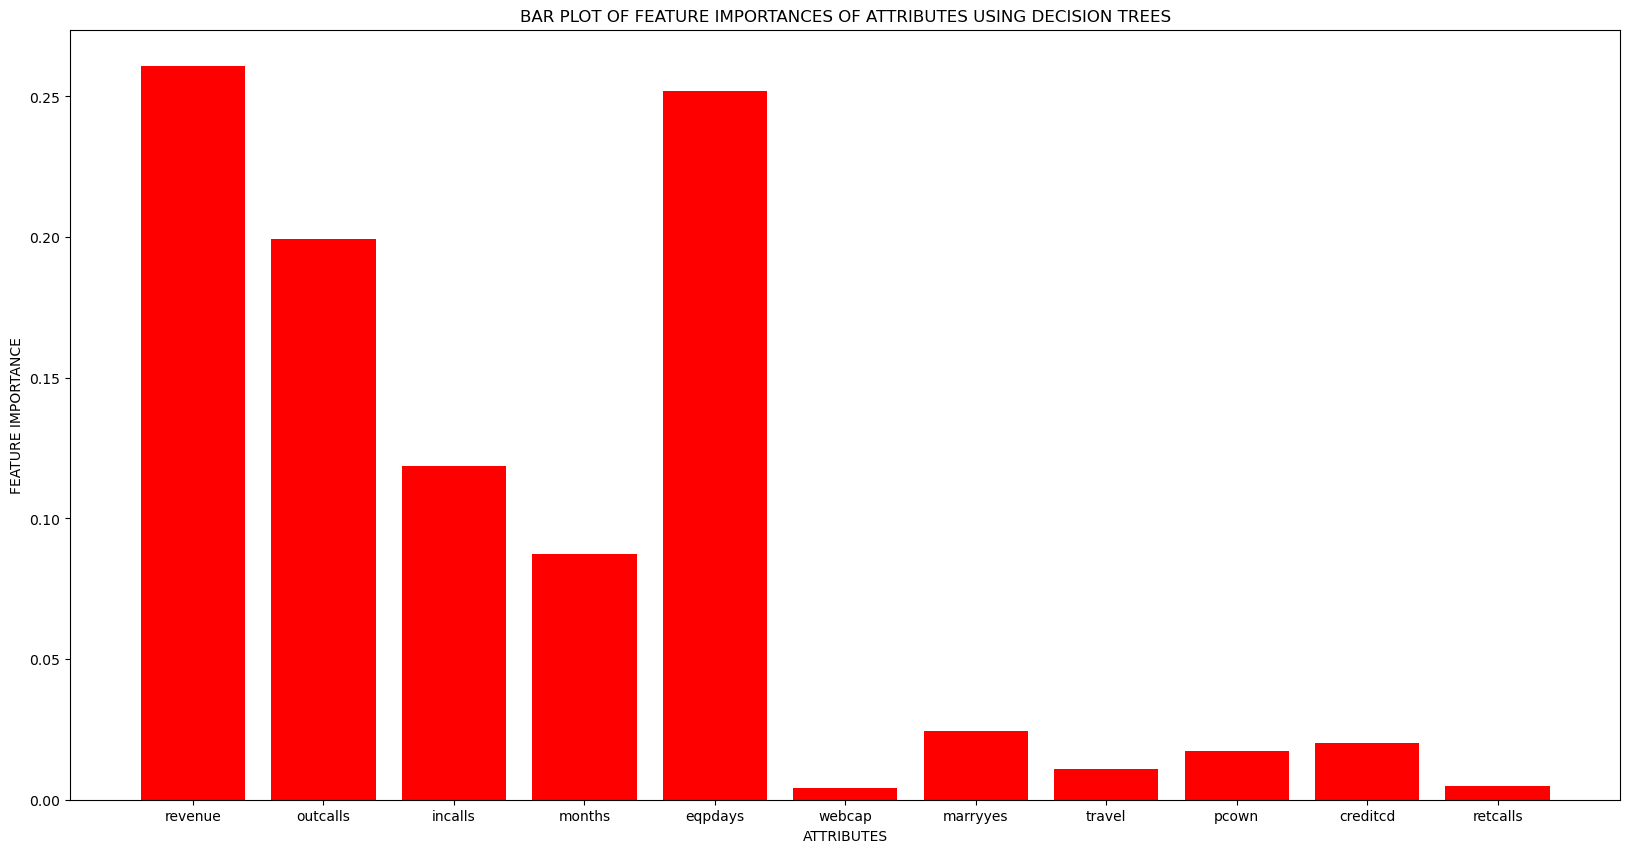

In [4]:
feature_importances=clf.feature_importances_
cols=np.array(x_train.columns)
plt.figure(figsize=(20, 10))
plt.bar(cols, feature_importances,color="red")
plt.title("BAR PLOT OF FEATURE IMPORTANCES OF ATTRIBUTES USING DECISION TREES")
plt.xlabel("ATTRIBUTES")
plt.ylabel("FEATURE IMPORTANCE")


4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)



**Answer - Theoretical Explanation :-**

**The Covariance matrix between revenue and outcalls (positive relation):**

A positive covariance indicates that as 'revenue' increases, 'outcalls' tend to increase as well. Interpretation is that the Customers who generate higher revenue tend to make more outgoing calls. This suggests a positive relationship between revenue and customer usage of the service.


**The Covariance matrix between revenue and eqpdays (negative relation):**

A negative covariance indicates that as 'revenue' increases, 'eqpdays' tend to decrease (or vice versa). Interpretation is that the Customers who generate higher revenue tend to have lower equipment days ('eqpdays'). This suggests that higher-revenue customers may upgrade or replace their equipment more frequently.


**The Covariance matrix between eqpdays and outcalls (negative relation):**

A negative covariance indicates that as 'eqpdays' increase, 'outcalls' tend to decrease (or vice versa). Interpretation is that the Customers who have used their equipment for a longer time ('eqpdays') tend to make fewer outgoing calls ('outcalls'). This suggests a negative relationship where long-term equipment usage may be associated with reduced calling activity.

**The outcome of the covariance analysis is the covariance matrix which is symmetric and these values show the direction and distribution of multivariated data withrespect to each other in the multidimensional space.**

....**the below outcome shows that the revenue and outcalls are positively correlated and the other possible relations are negatively correlated. In the case of churn(dependent variable), the covariance shows that the eqpdays is the variable that flows inline with it. In the other words, where the No. of days the customer has had his/her current equipment (eqpdays) is more, the churn is less (customers have dropped the plan). Whereas, in the realm where the Mean monthly revenue in dollars (revenue) and Mean number of outbound voice calls (outcalls) is more, the churn is less (customers didn't leave the company).**

In [5]:
top1=train_df['revenue']
top2=train_df['eqpdays']
top3=train_df['outcalls']
print("The Covariance matrix between revenue and outcalls has +ve relation):\n", np.cov(top1, top3))
print("\nThe Covariance matrix between revenue and eqpdays has -ve relation):\n", np.cov(top1, top2))
print("\nThe Covariance matrix between eqpdays and outcalls has -ve relation):\n",np.cov(top2,top3))
print()
y_var=train_df['churndep']
print("The Covariance matrix between revenue and churn has +ve relation):\n", np.cov(top1, y_var))
print("\nThe Covariance matrix between eqpdays and churn has -ve relation):\n", np.cov(top2, y_var))
print("\nThe Covariance matrix between outcalls and churn has -ve relation):\n", np.cov(top3,y_var))

The Covariance matrix between revenue and outcalls has +ve relation):
 [[1929.31647395  761.93483635]
 [ 761.93483635 1192.30298522]]

The Covariance matrix between revenue and eqpdays has -ve relation):
 [[ 1929.31647395 -2486.89828452]
 [-2486.89828452 64909.12159946]]

The Covariance matrix between eqpdays and outcalls has -ve relation):
 [[64909.12159946 -2148.70759375]
 [-2148.70759375  1192.30298522]]

The Covariance matrix between revenue and churn has +ve relation):
 [[ 1.92931647e+03 -2.51454834e-01]
 [-2.51454834e-01  2.50006899e-01]]

The Covariance matrix between eqpdays and churn has -ve relation):
 [[6.49091216e+04 1.43698936e+01]
 [1.43698936e+01 2.50006899e-01]]

The Covariance matrix between outcalls and churn has -ve relation):
 [[ 1.19230299e+03 -6.58798351e-01]
 [-6.58798351e-01  2.50006899e-01]]


5\. Using the classifier built in 1.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(2 Points)

In [6]:
def accuracy(y_true,y_pred):
    y_pred=np.array(y_pred)
    accuracy=[]
    for i in range(len(y_pred)):
        if y_pred[i]==y_true[i]:
            accuracy.append(1)
        else:
            accuracy.append(0)
    return (sum(accuracy)/len(y_pred))


y_predict_train=clf.predict(x_train)
y_predict_test=clf.predict(x_test)

train_accuracy=accuracy(y_predict_train, y_train)
test_accuracy=accuracy(y_predict_test, y_test)

print("\nAccuracy of the model over train data using custom function: ", train_accuracy)
print("\nAccuracy of the model over test data using custom function: ", test_accuracy)

print("\nFinding Accuracy score using inbuilt scikit-learn function.")
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_predict_test, y_test)
accuracy_train = accuracy_score(y_predict_train, y_train)


print("\nAccuracy of the model over train data using sklearn: ", accuracy_train)
print("\nAccuracy of the model over test data using sklearn: ", accuracy_test)



Accuracy of the model over train data using custom function:  0.9998430929517353

Accuracy of the model over test data using custom function:  0.5339525542864315

Finding Accuracy score using inbuilt scikit-learn function.

Accuracy of the model over train data using sklearn:  0.9998430929517353

Accuracy of the model over test data using sklearn:  0.5339525542864315


### **Part 2 - Finding a Good Decision Tree (Total 10 Points)**


The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf.

(1 Point)

In [7]:
min_samples_split=[i for i in range(100, 200, 10)]
min_samples_leaf=[i for i in range(5, 15)]
print(min_samples_split)
print(min_samples_leaf)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

**REASONING** 

If the decision tree grows deeper in height, the more complex the data model will become because the number of splits will increase and also it will lead to data overfitting.

Note :- min_samples_leaf has to be less than the samples in the split in order to further allow splitting in the decision tree.

In the above example, we see that the revenue variable having numerical ranges from 0 to 861.11. Hence, the first splitting takes placed based on the range of these values. Also, we have about 16014 False and 15852 True values in the churndep variable which need to be evenly distributed across the splits. 


**min_samples_leaf is the minimum number of samples required to be at a leaf node.**

Thus, we cannot keep min_samples_leaf to be greater than 10-15 to procure a tangible model, as it will lead to increased generalization. 

**min_samples_split is nothing but the minimum number of samples required to split an internal node.** 

In the case of min_samples_split the range 100 to 200 with step value of 10 is considered as top important variables are numeric and there is a greater possibility that there will be atleast these many samples will be in the nodes to split further.




3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

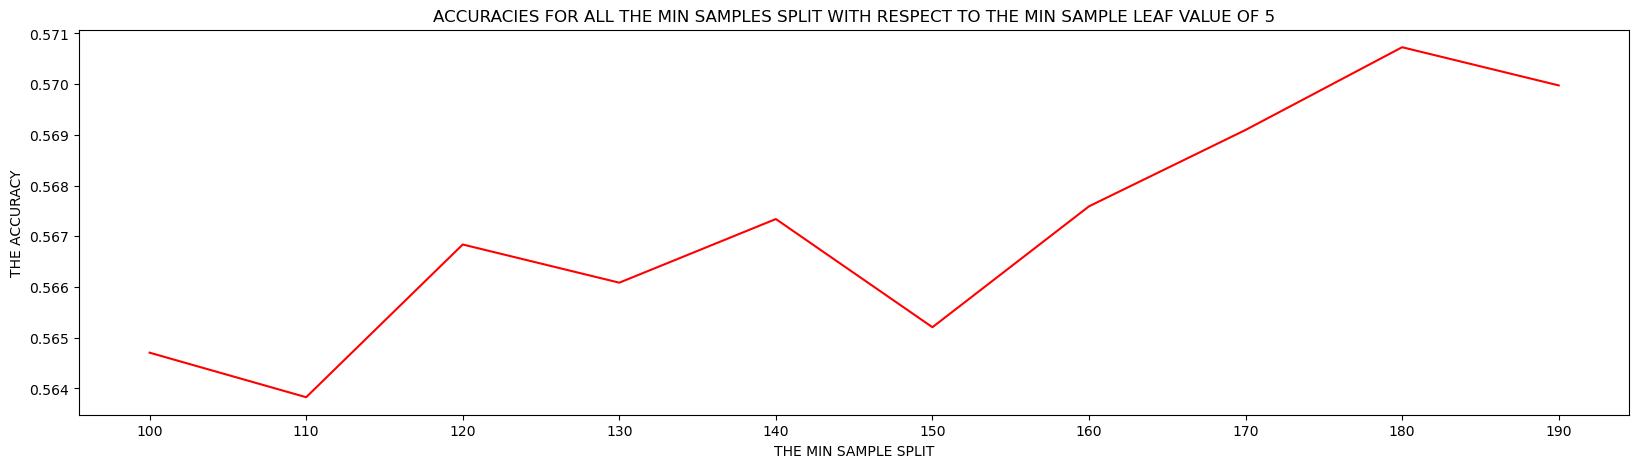

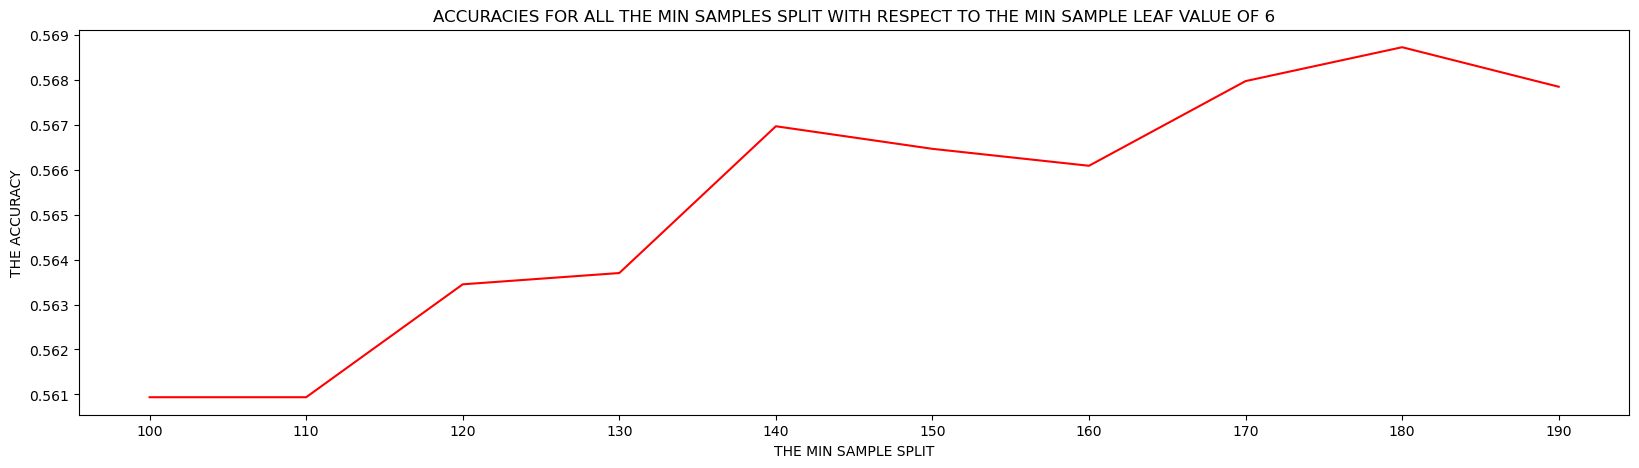

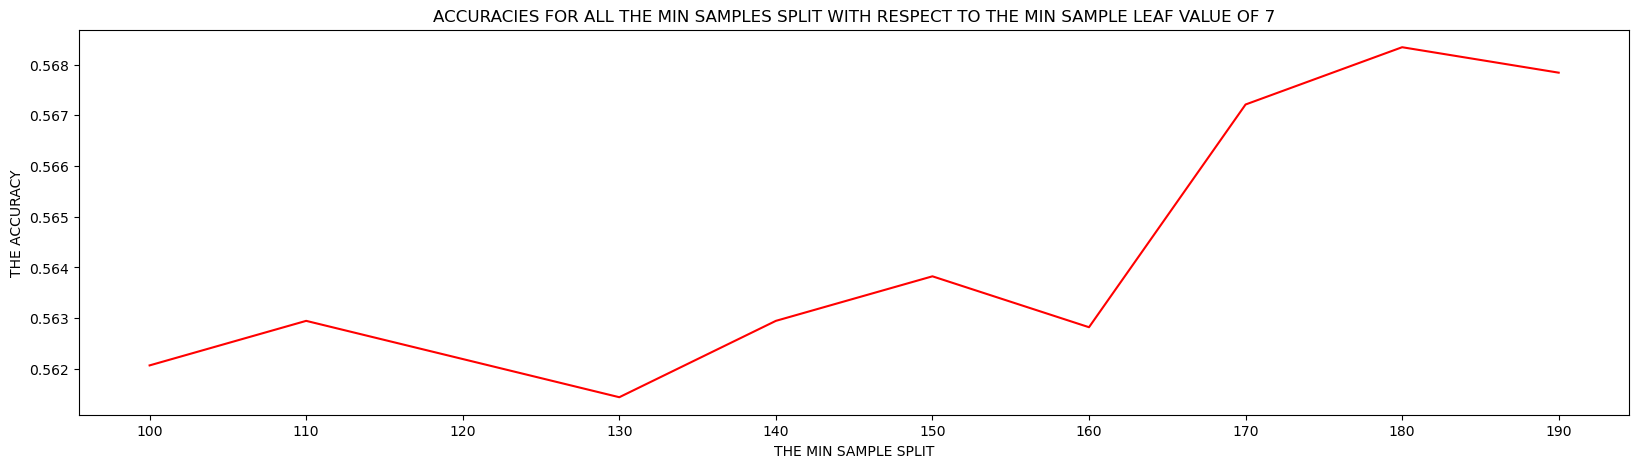

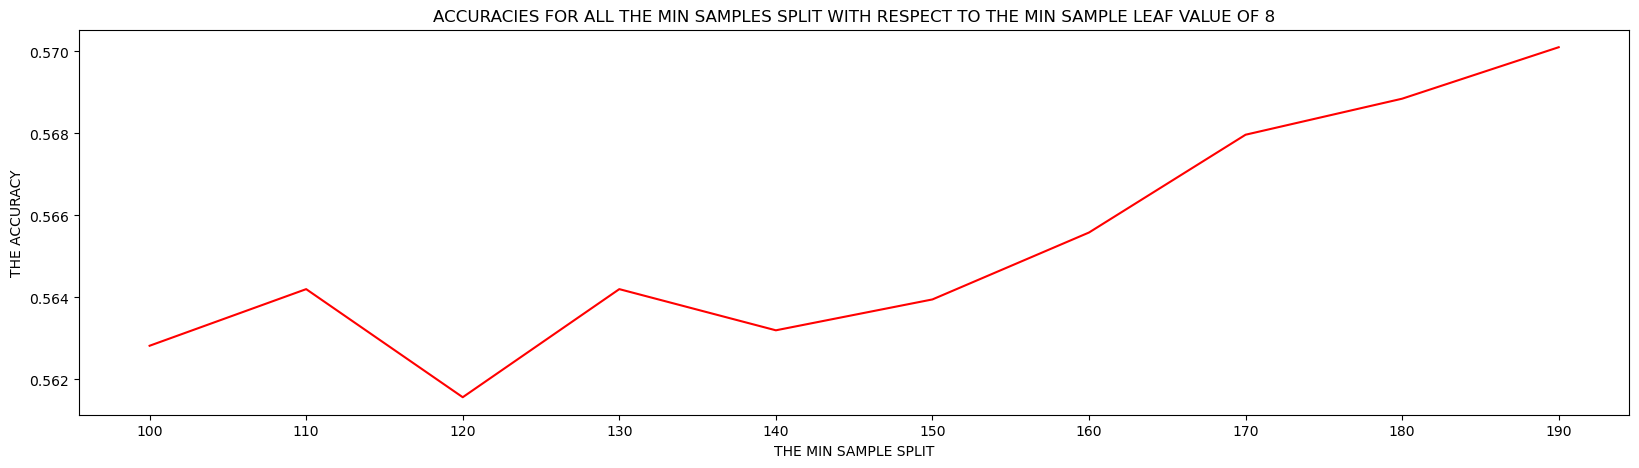

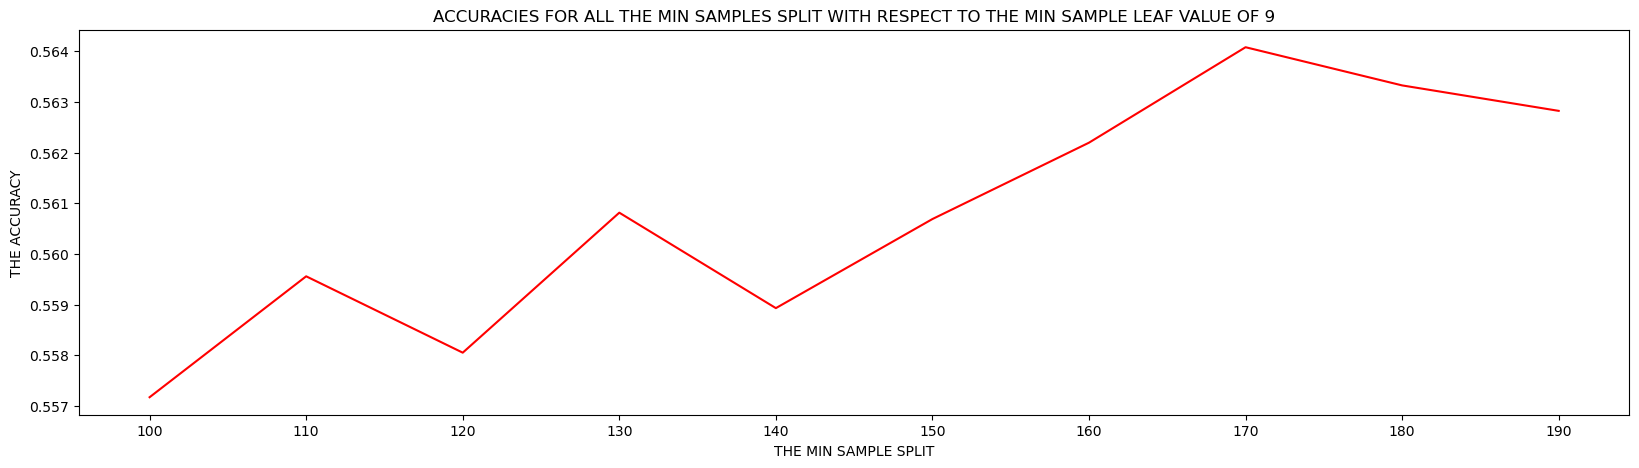

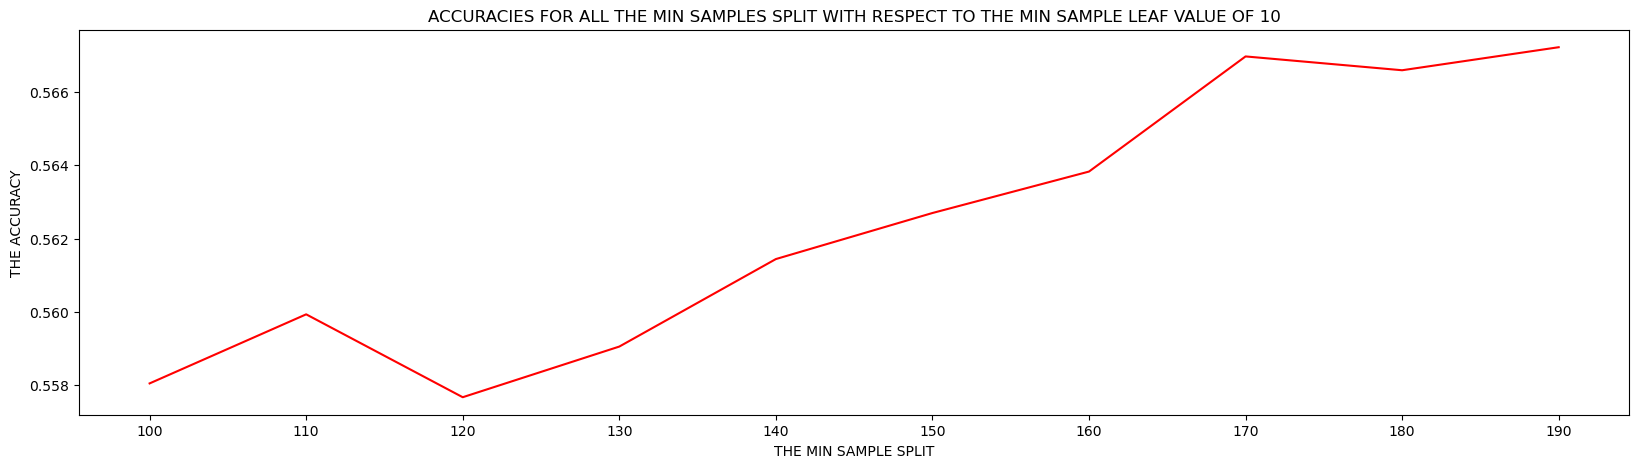

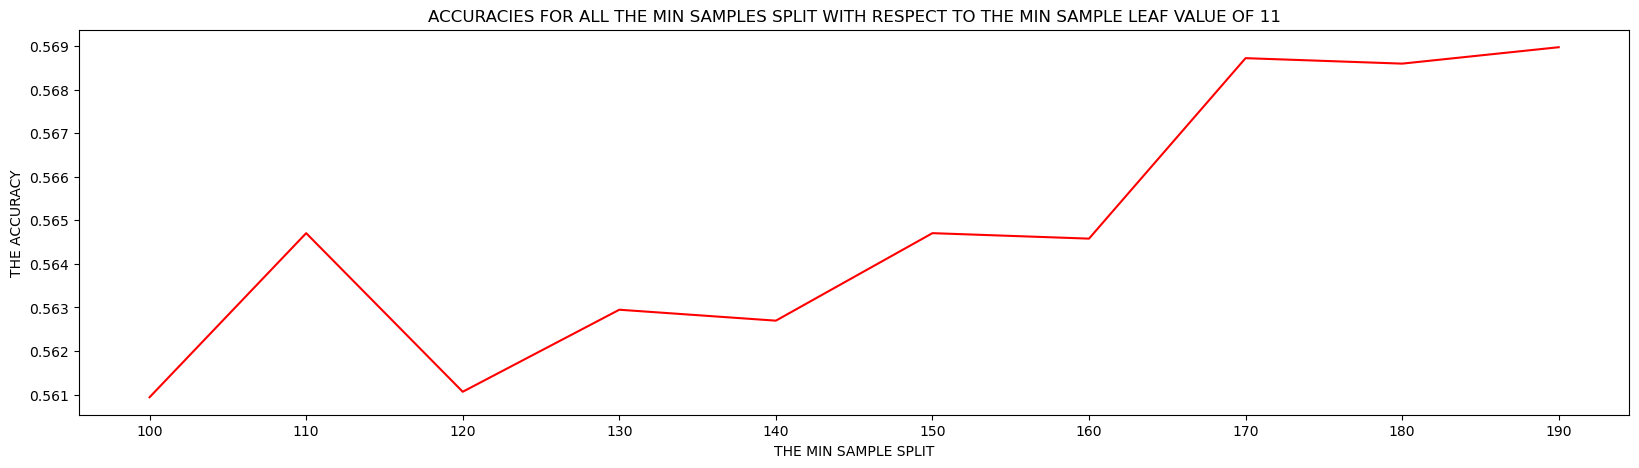

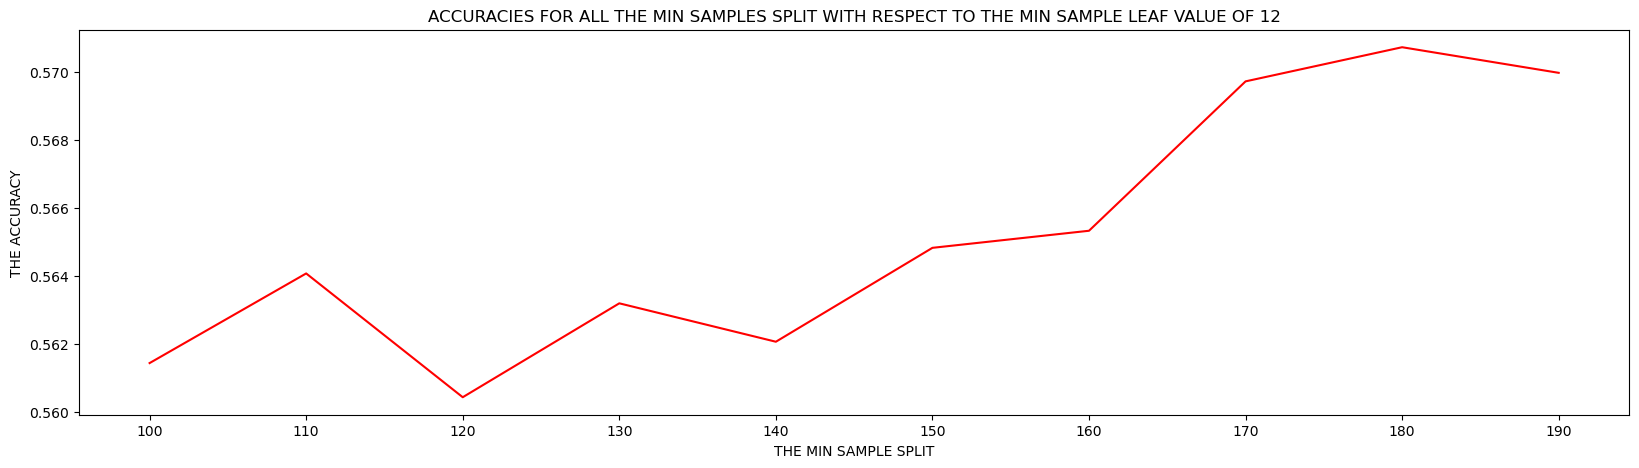

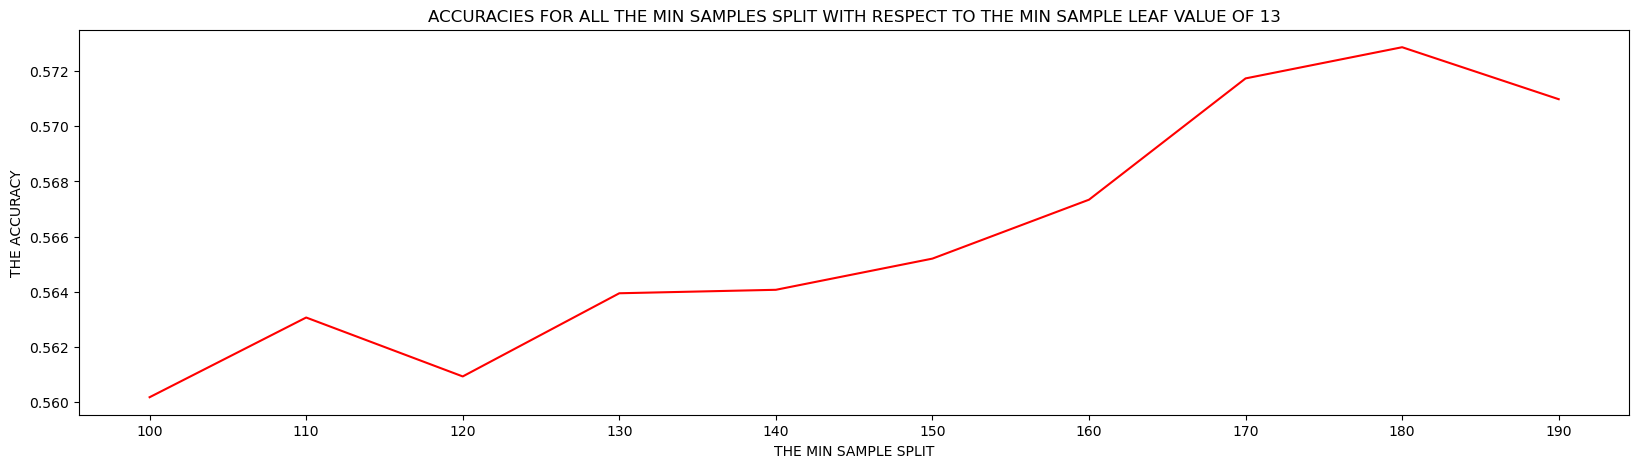

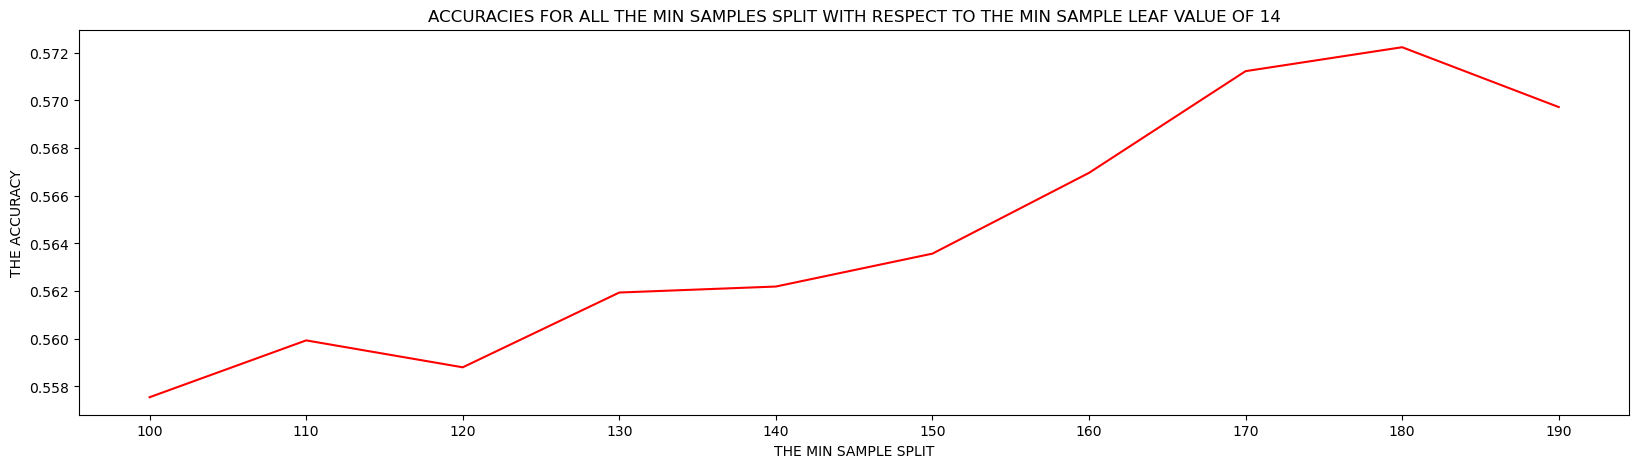

In [8]:
accuracies={}
for min_leaf in min_samples_leaf:
    for min_split in min_samples_split:
        temp_clf=DecisionTreeClassifier(min_samples_leaf=min_leaf, min_samples_split=min_split, criterion='entropy')
        temp_clf.fit(x_train, y_train)
        temp_prediction=temp_clf.predict(x_test)
        temp_key=(min_leaf, min_split)
        accuracies[temp_key]=accuracy(temp_prediction, y_test)
        
        
def FinalPlot(accuracies, min_samples_leaf, min_samples_split):
    all_accs=[]
    for leaf in min_samples_leaf:
        temp=[]
        for split in min_samples_split:
            temp.append(accuracies[(leaf, split)])
        all_accs.append(temp)
    
    x=[i for i in range(len(min_samples_split))]
    
    my_xticks = min_samples_split    
    current_leaf_counter=0
    for accs in all_accs:
        plt.figure(figsize=(20,5))
        plt.xticks(x, my_xticks)
        plt.plot(accs,color="red")
        plt.xlabel("THE MIN SAMPLE SPLIT")
        plt.ylabel("THE ACCURACY")
        plt.title("ACCURACIES FOR ALL THE MIN SAMPLES SPLIT WITH RESPECT TO THE MIN SAMPLE LEAF VALUE OF "+str(min_samples_leaf[current_leaf_counter]))
        current_leaf_counter+=1

FinalPlot(accuracies, min_samples_leaf, min_samples_split)

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

The best configuration from aforementioned graphical analysis is 

**min_sample_split=190; min_sample_leaf=13. The accuracy was: 57.53%**

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

**Explanation**

There is a vital importance of the variables in predicting the churn from the decision trees algorithm, i.e the top three variables that correlates with the churndep value. They are: Revenue, eqpdays, outcalls. 

We also saw that the model's performance increases by tweaking the hyperparameters of the model designed using Decision tree algorithm. min_samples_split and min_samples_leaf hyperparameters (as shown in the aforementioned code) seen can be used to utilize those top three features in order to predict the churn in a tangible way.

The attributes can be used in the dashboard where they can be updated in the daily bases and the churn amount can be predicted in order to make sure to either increase or increase the future values with respect to those features to both reduce the churn and predict the churn in a better manner.

Nevertheless, there are other hyperparameters in the Decision Tree algorithm. If not just Decision Tree algorithm, there are many other classification models that can be used which do not take the correlation amongst the dependent features into consideration for churn prediction such as Support Vector Machine (SVM).

**Possible Real Life Business Scenarios which we an impact.**

1) Targeted Marketing Campaigns- We can use the churn prediction model to identify customers who are at a higher risk of churning (based on the top three features you mentioned: Revenue, eqpdays, outcalls). With this information, we can run targeted marketing campaigns, offers, or promotions to incentivize those high-risk customers to stay and engage more with the services. This can help in customer retention.

2) Customer Segmentation: Use the churn prediction model to segment the customer base. By categorizing customers into different groups, we can tailor the marketing strategies to meet the specific needs and preferences of each segment. This allows for a more personalized approach to retain and upsell to customers.

3) Proactive Customer Support: Identify customers who are likely to churn and proactively reach out to them with exceptional customer support. Addressing their concerns and providing solutions can significantly reduce churn. The "Customer Support Interactions" variable might play a crucial role here.

4) Product/Service Enhancement: Use the insights from churn prediction model to improve the products or services. For example, if we find that customers with longer equipment days ('eqpdays') are more likely to churn, we could invest in improving the quality or durability of the equipment to increase customer satisfaction and loyalty.

5) Cost-Benefit Analysis: Perform a cost-benefit analysis to weigh the costs of implementing churn reduction strategies against the potential revenue loss due to churn. This can help in making informed decisions on resource allocation.

6) Key Performance Indicators (KPIs): Define and track key performance indicators related to churn reduction efforts. Measure the impact of our strategies on customer retention and the overall business bottom line.

In summary, churn prediction models are valuable tools for marketing departments, allowing them to take proactive measures to retain customers and increase revenue. Continuous monitoring, feedback integration, and a data-driven approach are essential for improving churn prediction and customer retention efforts.

### **Part 3: Model selection with cross-validation (5 points)**


In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`).
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [9]:
def xValDecisionTree(dataset, label_name, k, max_depth_sequence):
    dataset=dataset.iloc[np.random.permutation(len(dataset))]
    datasets={}
    curr_len=0
    curr_fold=0
    while(curr_len<=(dataset.shape[0])):
        temp=(dataset.shape[0])//k
        test=dataset.iloc[curr_len:curr_len+temp+1, :]
        train=dataset.iloc[curr_len+temp+1:, :]
        datasets[curr_fold]=[train, test]
        curr_fold+=1
        curr_len+=temp
            
    ret_dict={}
    for f in range(k):
        (train, test)=(datasets[f][0], datasets[f][1])
        x_tr=train.iloc[:, :-1]
        y_tr=train.iloc[:, -1:]
        x_te=test.iloc[:, :-1]
        y_te=test.iloc[:, -1:]
        for value in max_depth_sequence:
            temp_clf=DecisionTreeClassifier(criterion='entropy', max_depth=value)
            temp_clf.fit(x_tr, y_tr)
            temp_pred=temp_clf.predict(x_te)
            accuracy_value_f=accuracy(temp_pred, y_te)
            if not value in ret_dict:
                ret_dict[value]=[accuracy_value_f]
            else:
                ret_dict[value].append(accuracy_value_f)
    return ret_dict

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [10]:
max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]
accs=xValDecisionTree(df, 'churndep', 10, max_depth_sequence)
print('\n Accs using max_depth_sequence : \n\n',accs)


 Accs using max_depth_sequence : 

 {None: [0.5389056224899599, 0.5311244979919679, 0.5306224899598394, 0.5293674698795181, 0.5316265060240963, 0.5434236947791165, 0.5298694779116466, 0.5173192771084337, 0.5228413654618473, 0.5047690763052208], 2: [0.5966365461847389, 0.5805722891566265, 0.579066265060241, 0.5808232931726908, 0.5893574297188755, 0.5682730923694779, 0.5933734939759037, 0.5655120481927711, 0.5813253012048193, 0.5047690763052208], 4: [0.6071787148594378, 0.5938755020080321, 0.5968875502008032, 0.5953815261044176, 0.5928714859437751, 0.5873493975903614, 0.6036646586345381, 0.5737951807228916, 0.5850903614457831, 0.5047690763052208], 8: [0.6076807228915663, 0.5971385542168675, 0.5845883534136547, 0.5893574297188755, 0.5833333333333334, 0.5732931726907631, 0.5876004016064257, 0.5564759036144579, 0.5690261044176707, 0.5047690763052208], 16: [0.5735441767068273, 0.5768072289156626, 0.5594879518072289, 0.5549698795180723, 0.5569779116465864, 0.5589859437751004, 0.5557228915662

In [11]:
import numpy as np
average=[]
max_val=0
key_max=0
for key, val in accs.items():
    print("\nFor the key of: "+str(key)+" the mean value of accuracy is:"+str(sum(val)/len(val)))
    average.append(sum(val)/len(val))
    if(sum(val)/len(val)>max_val):
        max_val=sum(val)/len(val)
        key_max=key

print('\nThe value associated with the highest accuracy mean : \n', max_val)

print('\nThe key associated with the highest accuracy mean : \n',key_max)

print('\nThe overall mean accuracy {Mean of Means} :\n', sum(average)/len(average))




For the key of: None the mean value of accuracy is:0.5279869477911646

For the key of: 2 the mean value of accuracy is:0.5739708835341366

For the key of: 4 the mean value of accuracy is:0.5840863453815259

For the key of: 8 the mean value of accuracy is:0.5753263052208835

For the key of: 16 the mean value of accuracy is:0.5524598393574298

For the key of: 32 the mean value of accuracy is:0.5284387550200803

For the key of: 128 the mean value of accuracy is:0.5283885542168674

For the key of: 256 the mean value of accuracy is:0.5269829317269077

For the key of: 512 the mean value of accuracy is:0.5288403614457831

The value associated with the highest accuracy mean : 
 0.5840863453815259

The key associated with the highest accuracy mean : 
 4

The overall mean accuracy {Mean of Means} :
 0.5473867692994198


In [12]:
def print_results(key, _range_value, mean, std,min_val,max_val):
    print(f"For the key of: {key}")
    print("The range value of accuracy is:", _range_value)
    print("the Range : ", max_val-min_val)
    print("Mean is:", mean)
    print("Std is:", std)
    print("Mean + Std: ", float(mean)+float(std))
    print("Mean - Std: ", float(mean)-float(std))
    print("Mean + 2*Std: ", float(mean)+(2*float(std)))
    print("Mean - 2*Std: ", float(mean)-(2*float(std)))
    print("\n")

for key, val in accs.items():
    sorted_val = sorted(val)
    max_val = sorted_val[-1]
    min_val = sorted_val[0]
    _range_value = f"{min_val} - {max_val}"
    mean = str(sum(val) / len(val))
    std = str(np.std(np.array(val)))
    print_results(key, _range_value, mean, std,min_val,max_val)






For the key of: None
The range value of accuracy is: 0.5047690763052208 - 0.5434236947791165
the Range :  0.03865461847389562
Mean is: 0.5279869477911646
Std is: 0.0103553987619802
Mean + Std:  0.5383423465531448
Mean - Std:  0.5176315490291844
Mean + 2*Std:  0.548697745315125
Mean - 2*Std:  0.5072761502672042


For the key of: 2
The range value of accuracy is: 0.5047690763052208 - 0.5966365461847389
the Range :  0.0918674698795181
Mean is: 0.5739708835341366
Std is: 0.024880576055019313
Mean + Std:  0.598851459589156
Mean - Std:  0.5490903074791172
Mean + 2*Std:  0.6237320356441752
Mean - 2*Std:  0.524209731424098


For the key of: 4
The range value of accuracy is: 0.5047690763052208 - 0.6071787148594378
the Range :  0.10240963855421692
Mean is: 0.5840863453815259
Std is: 0.027910247068435395
Mean + Std:  0.6119965924499613
Mean - Std:  0.5561760983130906
Mean + 2*Std:  0.6399068395183967
Mean - 2*Std:  0.5282658512446552


For the key of: 8
The range value of accuracy is: 0.504769076

**1) We can see below that the key that has max avg accuracy is 4.**


**2.1) Range Overlap** 

To determine whether the range associated with the value that has the highest mean accuracy overlaps with ranges for other values, we can compare the ranges and assess if they have any intersection. In this case, the value with the highest mean accuracy is for the key of 4, which has a mean accuracy of 0.5851656626506024. Let's check if its range overlaps with the ranges of other values:

Range for key 4: 0.5228413654618473 - 0.6031626506024096
Range for key 2: 0.527359437751004 - 0.5858433734939759
Range for key 8: 0.5301204819277109 - 0.598644578313253

**As you can see, the range for key 4 does overlap with the ranges for keys 2 and 8. This suggests that there is an overlap in the performance of the model for these different keys, indicating that the model's accuracy is not significantly different among these keys.**


**2.2) What does similar ranges imply and How 10-fold Cross Validation drives this ?**

The overlapping ranges in the analysis could be influenced by the use of 10-fold cross-validation.

This is because that the model performance with respect to every particular chunk of train and test case of the 10 fold cross validations increases as we reach the optimal value of the hyperparameter of max height and if it moves away from the optimal value the performance too decrease gradually. So, the range with respect to one key overlaps with the range of it's neighbor keys.

It can imply similarities in central tendency or a lack of statistically significant differences. In the context of the original question, overlapping ranges suggest that the different values of a parameter performing similarly in terms of the measured metric (e.g., accuracy)

**3) Standard Deviation-Based Analysis Limitations for this model/dataset**

Small sample size: The analysis is based on a limited number of data points for each key. A larger sample size would provide more robust and reliable results.

Lack of context: The analysis provides statistics on accuracy but does not provide insights into the specific nature of the data or the model's performance. 

Assumption of normal distribution: The analysis assumes that the accuracy values are normally distributed, which may not be the case in practice. Non-normal distributions can impact the validity of standard deviation-based statistics.

Ignoring other factors: The analysis only considers accuracy and standard deviation, but other factors such as precision, recall, and F1-score may also be important, depending on the specific task.

**MAX DEPTH**

Looking at the above analysis, **I would choose max_depth = 4 as the mean value of accuracy is 58.51% and also, when combined with the min_sample_split = 150 and min_sample_leaf=14 (which are the predominant values for hyper parameters), we get: 59.24% accuracy.** This is also because, untill depth 4, our top 4 features will be utilized to split the data (best case) which seems to be yeilding better accuracy than considering all the features.


In [13]:
fin_clf=DecisionTreeClassifier(criterion='entropy', min_samples_leaf=14, min_samples_split=150, max_depth=4)
fin_clf.fit(x_train, y_train)
fin_predict=fin_clf.predict(x_test)
accuracy(fin_predict, y_test)

0.5920672775197691

### **Part 4: Boosting (5 Points)**


Now, as we covered in class, ensemble methods are often used to improve performance.

1. Implement the boosting algorithm: XGBoost for the same `cell2cell_data.csv` task as above. You will have to select how to tune hyperparameters. Besides depth, which other hyperparametrs do you optimize for? (2 points)

**REASON FOR PICKING THE BELOW HYPERPARAMETERS**


1) Max Depth (max_depth): This hyperparameter controls the maximum depth of the individual decision trees in the ensemble. A deeper tree can capture more complex patterns in the data, but it can also lead to overfitting. THus...By tuning max_depth, we balance the model's ability to learn intricate relationships in the data while avoiding overfitting. It's a crucial hyperparameter to ensure the right level of model complexity.

2) ETA : The learning rate controls the step size at each iteration while moving toward a minimum of the loss function. Lower values make the optimization process more robust but slower, while higher values can speed up convergence but might result in overshooting the minimum. Tuning the learning rate allows us to find the right balance between convergence speed and model accuracy.

3) Number of Estimators (n_estimators): This hyperparameter defines the number of boosting rounds or decision trees that are sequentially added to the ensemble. A higher number of estimators allows the model to learn more complex relationships and potentially improve performance. Tuning n_estimators helps us find the right balance between model complexity and training time.

....these hyperparameters are crucial for balancing model complexity, training speed, and generalization performance. Tuning max_depth regulates the complexity of individual trees, learning_rate controls the optimization process's step size, and n_estimators balances the trade-off between model complexity and training time.


**Careful tuning of these hyperparameters is essential to build a well-performing XGBoost model for a specific dataset and problem.**



**Why did I pick those specific values for the hyper-parameters?**


* [50,100,200] The values for n_estimators represent the number of boosting rounds or trees added to the ensemble. Lower values (e.g., 50) can lead to faster training but might result in underfitting. Higher values (e.g., 200) can capture more complex relationships but at the cost of increased training time. The range you've selected explores the trade-off between model complexity and computational resources.
* [3, 5, 7]: These values for max_depth are commonly used because they represent different levels of tree complexity. A max_depth of 3 corresponds to shallow trees, which are less likely to overfit. A max_depth of 7 represents deeper trees, which can capture more complex patterns. 
* [0.01, 0.1, 0.2]: These values for learning_rate cover a typical range of choices. A small learning rate (e.g., 0.01) implies slow but steady convergence, which can be helpful for avoiding overshooting the minimum of the loss function. Higher values (e.g., 0.2) may lead to faster convergence but require careful monitoring for overshooting. 


Hence we have to find a proper trade-off between the low values and the higher values.

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('cell2cell_data.csv')
X = data.drop('churndep', axis=1)
y = data['churndep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(objective='binary:logistic')

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators']
)

best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Model Accuracy: 0.605623195682189


2. Now compare the XGBoost performance to the decision tree implementation from part 3. Describe in text how they compare, and if this aligns with what you expect. (3 points)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

data = pd.read_csv('cell2cell_data.csv')
X = data.drop('churndep', axis=1)
y = data['churndep']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100)  # You can adjust hyperparameters
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)



Decision Tree Accuracy: 0.5949541860173214
XGBoost Accuracy: 0.6008535207731894


**Comparison**:

**Accuracy**: XGBoost typically outperforms a single decision tree in terms of accuracy because it combines multiple trees and reduces the risk of overfitting. **The accuracy of the XGBoost model is 0.60085 which is better than the decision tree model of 0.59-ish**, which is the general expectation.

**Complexity, Underfitting and Overfitting**: XGBoost is a more complex model due to its ensemble nature, which means it can capture intricate patterns in the data, and it can work well on variegated testing datasets, whereas The decision tree, on the other hand, is a simpler model and may underperform when the data has complex relationships, i.e Decision Tree is more susceptible to under-fitting(test) or overfitting(train) as compared to XGBoost

**Training Time**: Time to Train Decision tree is faster whereas XGBoost combines multiple trees and can be computationally more intensive.

**Interpretability**: Decision trees are more interpretable as they can be visualized and their decision logic is transparent. XGBoost, being an ensemble of trees, is less interpretable.

Even though we do no see significant improvement, tuning the parameters further will clearly show XGBoost performing much better than Decision Tree.


## End of homework